# Registration

Linear and nonlinear registration can be conducted in `nlreg1d` using the `register_linear` and `register_srsf` functions, respectively. The latter is a wrapper to the square root velocity framework registration procedure in the [fdasrsf](https://github.com/jdtuck/fdasrsf_python) package.

Let's use the `Dorn2012` ground reaction force (GRF) dataset to demonstrate these procedures. This dataset consists of anterioposterior ground reaction forces (GRF) measured at four different running speeds, here coded as "0", "1", "2", and "3", in order of increasing speed.

Note that this dataset is saved in NPZ format in the repository's `Data` directory: `Dorn2021-reduced.npz`.

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import nlreg1d as nl

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


### Load data

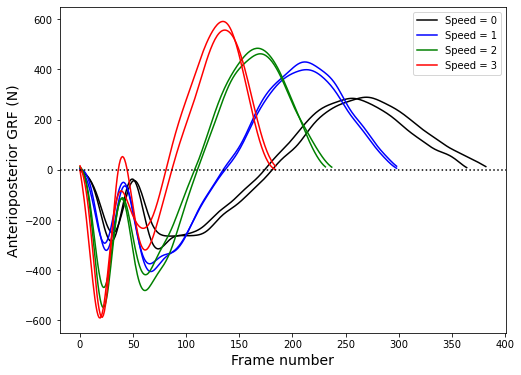

In [2]:
dataset = nl.data.Dorn2012()
speed   = dataset.group  # running speed
y       = dataset.dv     # dependent variable (anterioposterior ground reaction forces)

def plot_Dorn2012(y, xlabel='Frame number', ylabel='Anterioposterior GRF (N)', title=None):
    plt.figure( figsize=(8,6) )
    ax      = plt.axes()
    colors  = ['k', 'b', 'g', 'r']
    h       = []
    for i,c in enumerate(colors):
        for yy in y[speed==i]:
            hh = ax.plot(yy, color=c)[0]
        h.append( hh )
    ax.axhline(0, color='k', ls=':')
    ax.set_xlabel(xlabel, size=14)
    ax.set_ylabel(ylabel, size=14)
    ax.legend( h, [f'Speed = {i}'  for i in range(4)] )
    if title is not None:
        ax.set_title(title, size=16)
    plt.show()
    

plot_Dorn2012( y )




### Linear registration

Note that the number of frames decreases as speed increases because the foot is contact with the ground for less time when running faster. These data can be linearly registered (i.e., interpolated to a common number of frames) using `register_linear`:

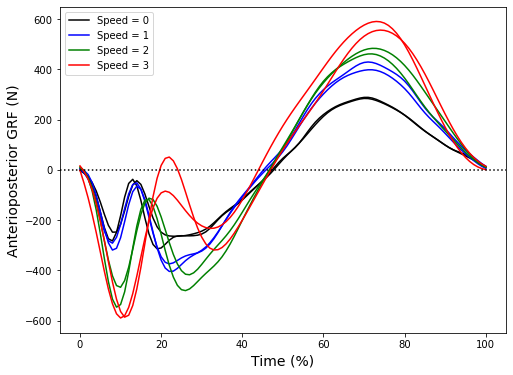

In [3]:
yi = np.array( [nl.register_linear(yy, n=101)   for yy in y] )

plot_Dorn2012( yi, xlabel='Time (%)' )


### Nonlinear registration

Note that the local extrema (local minima and local maxima) do not align in time in the figure above. This misalignment can be improved using nonlinear registration. The `register_srsf` function is a wrapper to the [srsf_align](https://github.com/jdtuck/fdasrsf_python/blob/master/fdasrsf/time_warping.py) function (see Line 77 at that link) from the [fdasrsf](https://github.com/jdtuck/fdasrsf_python/) package, and accepts the same keyword arguments as `srsf_align`.

The `register_srsf` function returns two outputs:

- `yr`: registered data: (J,Q) numpy array
- `wf`: optimal warp functions: (J,Q) numpy array

where:

- `J`: number of observations
- `Q`: number of grid points

Initializing...
Compute Karcher Mean of 8 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
maximal number of iterations is reached


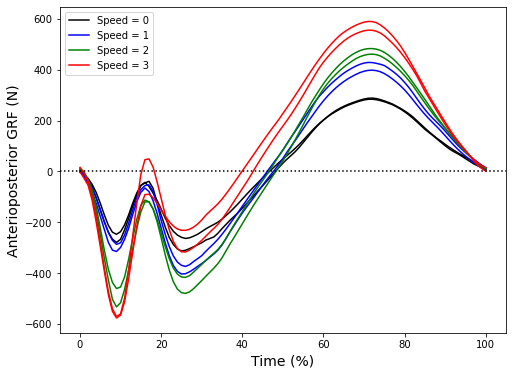

In [4]:
yr,wf = nl.register_srsf(yi, MaxItr=5)

plot_Dorn2012( yr, xlabel='Time (%)' )

The optimal warp functions can optionally be converted to a `Warp1DList` object to facilitate further processing:

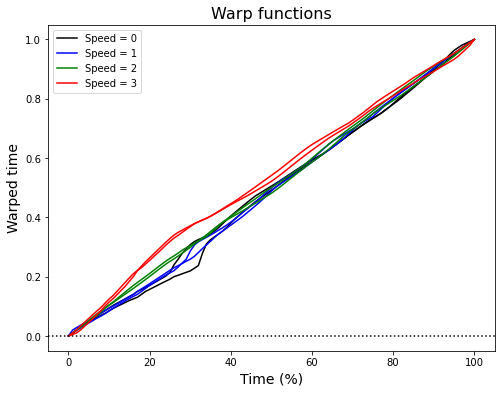

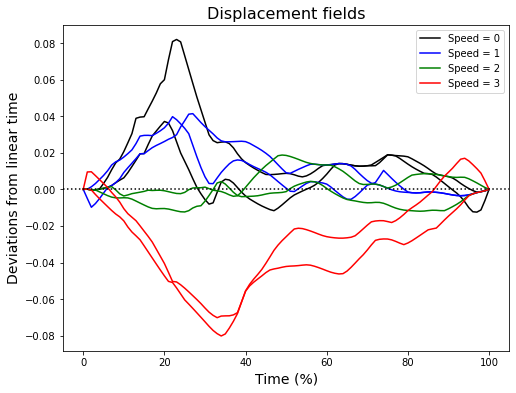

In [5]:

wlist = nl.Warp1DList(wf)
d     = wlist.get_displacement_field()


plot_Dorn2012( wf, xlabel='Time (%)', ylabel='Warped time', title='Warp functions' )

plot_Dorn2012( d, xlabel='Time (%)', ylabel='Deviations from linear time', title='Displacement fields' )
